<a href="https://colab.research.google.com/github/semogela/python-licoes/blob/main/Exerc%C3%ADcios_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando base de dados de um link de dados sobre frutas no GitHub.

In [5]:
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

Importando biblioteca NumPy.

In [6]:
import numpy as np

Utilizando a função np.loadtxt para transformar os dados da url em array, neste trecho estou delimitando a separação dos dados por vírgula, pulando a primeira linha (de títulos) e a primeira coluna (que seriam os nomes das frutas).

In [7]:
dados = np.loadtxt(url, delimiter=',', skiprows=1, usecols=np.arange(1,6,1))
dados.shape

(10000, 5)

Separando em variáveis informaçóes de diâmetro e peso das laranjas e toranjas.

In [8]:
diametro_laranja = dados[0:4999,0]
peso_laranja = dados[0:4999,1]

In [9]:
diametro_toranja = dados[5000:,0]
peso_toranja = dados[5000:,1]

Importando a biblioteca matplotlib.pyplot.

In [10]:
import matplotlib.pyplot as plt

Plotando o gráfico de linhas, que relaciona a massa das frutas com os diâmetros. Uma coisa engraçada desses dados é que, considerando as frutas como esféricas, a massa delas seria dada pela densidade*volume. E, sem fazer cálculo algum (posso deixar isso para análises futuras, por diversão), me parece que a massa varia muito pouco com a variação do diâmetro para os dois casos. A densidade está diminuindo?

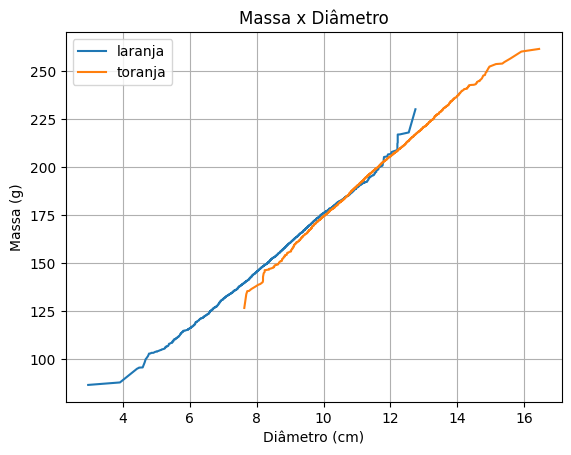

In [11]:
plt.plot(diametro_laranja,peso_laranja)
plt.plot(diametro_toranja,peso_toranja)
plt.title('Massa x Diâmetro')
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Massa (g)')
plt.grid()
plt.legend(['laranja', 'toranja'])
plt.show()

Não me aguentei e dei uma checada. Transferi as informações para o SI, para evitar erros.

In [12]:
import math

In [13]:
volumemenor = (math.pow(diametro_laranja[0]/(100),3)*np.pi)/6
volumemaior = (math.pow(diametro_laranja[4998]/(100),3)*np.pi)/6
print(volumemenor, volumemaior)

1.3579186575554885e-05 0.0010852484559670304


In [14]:
densidademenor = (peso_laranja[0]/1000)/volumemenor
densidademaior = (peso_laranja[4998]/1000)/volumemaior
print(densidademenor, densidademaior)

6389.189773427554 212.0528241571544


Vou tentar plotar um gráfico ideal, para a densidade se manter constante. Considerando um diâmetro inicial de 3cm e indo até 11cm, com saltos de 0.01cm, considerando a densidade de uma laranja de 768kg/m³. A ideia é plotar um gráfico que se comporte como uma curva de polinômio de grau 3.

In [15]:
diametro = np.arange(3, 11, 0.01)
diametro.shape


(800,)

In [16]:
massa = list(range(len(diametro)))
for i in range(len(diametro)):
  massa[i] = 768*(math.pow(diametro[i]/100,3)*np.pi/6)

massa = np.array(massa)
massa.shape

(800,)

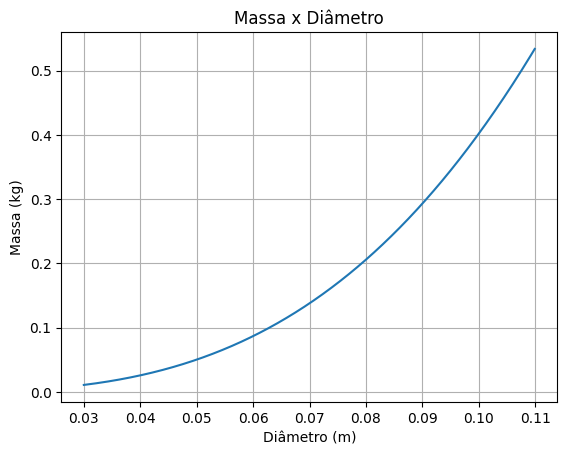

In [17]:
plt.plot(diametro/100,massa)
plt.title('Massa x Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Massa (kg)')
plt.grid()
plt.show()

De fato os dados são absurdos. Mas, de qualquer modo, para fins de prática da biblioteca NumPy, vou utilizar MMQ para ajustar uma reta aos dados de diâmetro e massa de laranjas e toranjas.

In [30]:
n = np.size(peso_laranja)
x = diametro_laranja
y = peso_laranja

In [35]:
a = (n*np.sum(x*y)-np.sum(x)*np.sum(y))/(n*np.sum(x**2)-np.sum(x)**2)
b = (np.sum(y)-a*np.sum(x))/n
print(a, b)

y = a*x + b

14.792405290382996 27.445152271123032


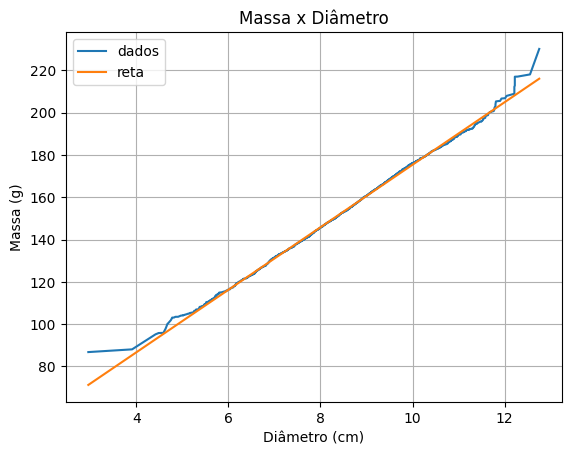

In [36]:
plt.plot(diametro_laranja,peso_laranja)
plt.plot(x, y)
plt.title('Massa x Diâmetro')
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Massa (g)')
plt.grid()
plt.legend(['dados', 'reta'])
plt.show()

Observando a reta, ela parece se adequar bem ao conjunto de dados. Vou tentar quantificar esse ajuste utilizando a função np.linalg.norm para calcular o somatório das distâncias dos pontos dos dados aos equivalentes na reta.


In [37]:
np.linalg.norm(peso_laranja-y)

44.38768704767194

O valor parece bom, visto que deve se aproximar de 0, e falamos de quase 5000 pontos. Posteriormente vou buscar uma forma mais eficiente de medir esse ajuste.

Agora vou fazer o mesmo para as toranjas.

In [54]:
n_toranja = np.size(peso_toranja)
x_toranja = diametro_toranja
y_toranja = peso_toranja

In [55]:
a_toranja = (n_toranja*np.sum(x_toranja*y_toranja)-np.sum(x_toranja)
*np.sum(y_toranja))/(n_toranja*np.sum(x_toranja**2)-np.sum(x_toranja)**2)
b_toranja = (np.sum(y_toranja)-a_toranja*np.sum(x_toranja))/n_toranja

print(a_toranja, b_toranja)

y_toranja = a_toranja*x_toranja + b_toranja

15.70884459360376 17.007102876817715


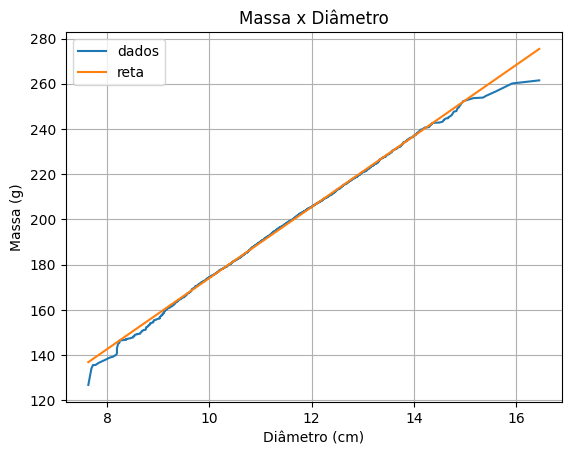

In [56]:
plt.plot(diametro_toranja, peso_toranja)
plt.plot(x_toranja, y_toranja)
plt.title('Massa x Diâmetro')
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Massa (g)')
plt.grid()
plt.legend(['dados', 'reta'])
plt.show()

In [59]:
np.linalg.norm(peso_toranja-y_toranja)

44.60533206058901

O grau de precisão no ajuste ficou parecido com o das toranjas. Observando os gráficos, nos dois casos é possível observar que as maiores discrepâncias estão no início e final das curvas. Isso poderia significar, em outro contexto, que uma reta poderia não ser o melhor ajuste para previsões, por exemplo?

De qualquer modo, essa não é a ideia aqui, não tem como o diâmetro das frutas aumentar tanto, então previsões aqui ficariam apenas no campo das ideias.